# Gamma Tuning

In [59]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name 
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'].to_markdown())
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

In [65]:
import joblib 
gamma_tune_dict = joblib.load('../not_on_git/gamma_tune_dict.pkl')
gamma_tune_dict

{0.08: <__main__.make_model at 0x7fecdd7a1c88>,
 0.09: <__main__.make_model at 0x7fecd8d8a240>,
 0.0: <__main__.make_model at 0x7fecd8c290f0>,
 0.01: <__main__.make_model at 0x7fecd8b48518>,
 0.02: <__main__.make_model at 0x7fecd89eb0b8>,
 0.03: <__main__.make_model at 0x7fecd89eebe0>,
 0.04: <__main__.make_model at 0x7fecd8988748>,
 0.05: <__main__.make_model at 0x7fecd889d2b0>,
 0.06: <__main__.make_model at 0x7fecd87be128>,
 0.07: <__main__.make_model at 0x7fecd87c6940>,
 0.065: <__main__.make_model at 0x7fecd86df780>,
 0.075: <__main__.make_model at 0x7fecd858f7f0>}

In [66]:

f1 , pres  , recall , mcc = []  , [] , [] , [] 
gamma = []
for el in gamma_tune_dict.keys():
    f1.append(gamma_tune_dict[el].result['f1'])
    pres.append(gamma_tune_dict[el].result['precision'])
    recall.append(gamma_tune_dict[el].result['recall'])
    mcc.append(gamma_tune_dict[el].result['mcc'])
    gamma.append(el)
gamma_score = pd.DataFrame({
    'gamma' : gamma ,
    'MCC' : mcc ,
    'precision' : pres , 
    'recall' : recall , 
    'f1 score' : f1 ,
}).sort_values(by='gamma').reset_index(drop=True)
gamma_score

,gamma,MCC,precision,recall,f1 score
0,0.000,0.902354,0.825647,0.741914,0.775135
1,0.010,0.903654,0.815030,0.744892,0.772984
2,0.020,0.904010,0.814175,0.750969,0.777873
3,0.030,0.908147,0.827579,0.773332,0.797430
4,0.040,0.907496,0.807328,0.764431,0.783577
5,0.050,0.905469,0.806781,0.771818,0.787540
6,0.060,0.906925,0.812620,0.790910,0.800966
7,0.065,0.906818,0.806899,0.788814,0.796865
8,0.070,0.911602,0.813208,0.799014,0.805188
9,0.075,0.906057,0.800935,0.794440,0.796469


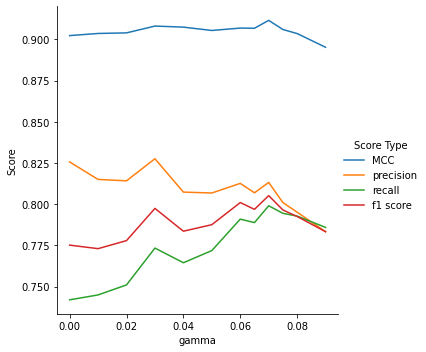

In [68]:
gamma_score_melt = gamma_score.melt(id_vars=['gamma'] , value_vars=['MCC' , 'precision' , 'recall' , 'f1 score'] , var_name='Score Type' , value_name='Score')
import seaborn as sns
sns.relplot(
    data = gamma_score_melt , 
    x = 'gamma' , 
    y = 'Score' , 
    hue = 'Score Type' , 
    kind='line'
)
plt.show()

# Calculate scores

In [1]:
import pandas as pd 
import numpy as np 
from utilities import get_score

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


In [16]:
df = pd.read_csv('temp_res_comp/train_prob/mode_GB.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/mode_RF.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/none_lightGBM.csv' , index_col='name')
df 

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J181044.4-260901,CV,PULSAR,0.494503,0.013341,0.393068,0.016631,0.007113,0.494503,0.044733,0.011582,0.019030
2CXO J104409.2-595904,YSO,YSO,0.781595,0.007102,0.032291,0.030874,0.011654,0.031463,0.087751,0.017270,0.781595
2CXO J224731.7+033549,AGN,PULSAR,0.360628,0.261291,0.057642,0.112283,0.009154,0.360628,0.028470,0.101648,0.068883
2CXO J053536.6-051850,STAR,STAR,0.909449,0.005718,0.039022,0.015799,0.010959,0.012286,0.909449,0.004848,0.001918
2CXO J201657.8-704703,ULX,PULSAR,0.479177,0.017152,0.394054,0.060770,0.014311,0.479177,0.016743,0.011379,0.006413
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J123613.4+275150,AGN,AGN,0.899162,0.899162,0.039616,0.005901,0.001148,0.001685,0.003309,0.048364,0.000816
2CXO J161436.5-223031,PULSAR,PULSAR,0.458746,0.005546,0.439247,0.018749,0.011930,0.458746,0.006238,0.055581,0.003963
2CXO J004142.9-091915,STAR,STAR,0.982564,0.005121,0.001937,0.008805,0.000297,0.000010,0.982564,0.001242,0.000024


In [17]:
get_score([df] , sc_average='macro')

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2633
 AGN           2184
 YSO           1182
 HMXB           786
 ULX            338
 CV             239
 PULSAR         196
 LMXB           145,
 'balanced_accuracy': 0.7951883707695815,
 'accuracy': 0.8908217577567181,
 'precision': 0.7099381876425648,
 'recall': 0.7951883707695815,
 'f1': 0.7404955122619998,
 'mcc': 0.8560587678459877,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.892693         0.978938  0.933828
 CV          0.620482         0.430962  0.508642
 HMXB        0.875668         0.833333  0.853977
 LMXB        0.804196         0.793103  0.798611
 PULSAR      0.554455         0.285714  0.377104
 STAR        0.915771         0.970376  0.942283
 ULX         0.758294         0.473373  0.582878
 YSO         0.939948         0.913706  0.926641}

# Feature Feature Correlation

# Missing features

In [18]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [19]:
from utilities import deets 
from choices import param_dict

In [28]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [29]:
x_all = x.copy()
x_all.insert(0 , 'class' , y.to_list())
x_all

,class,gal_b2,gal_l2,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,h-csc,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,2.487849,8.497420,2.632625,0.000904,5.046627,0.00,8.195828,1.0,1.499984e-09,...,4.784757,2.894845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,CV,4.327881,9.393618,9.999996,0.017956,1.995495,10.00,8.236122,0.0,1.102579e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,CV,2.488746,8.496825,9.999844,0.001090,6.298061,7.50,8.909807,1.0,8.495617e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,CV,2.489281,8.496673,8.302307,0.026969,8.383567,6.25,9.841010,2.0,9.022461e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,CV,2.487878,8.497314,5.005657,0.000442,7.272317,3.75,9.850364,2.0,1.416053e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,AGN,0.888957,8.713766,NaN,NaN,3.074255,NaN,0.408315,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,YSO,5.054270,2.262789,NaN,NaN,3.363494,NaN,8.996703,0.0,NaN,...,7.935403,4.953001,7.119828,NaN,6.445148,NaN,6.807378,5.048179,NaN,NaN
2CXO J131747.5+411745,AGN,9.176328,2.880393,NaN,NaN,1.768983,NaN,2.472603,0.0,9.654383e-08,...,8.002279,2.122574,NaN,5.055027,NaN,4.955872,NaN,NaN,NaN,6.731328


In [53]:
miss = []
for cl in y.unique():
#    cl = 'AGN'
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    miss.append((temp.isna().sum(axis=0) / len(temp)).to_frame(name=cl))
miss = pd.concat(miss , axis=1)
miss.insert(0 , 'overall' , (x.isna().sum(axis=0) / len(x)).to_list())
miss

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
gal_b2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gal_l2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
var_inter_prob_b,0.503440,0.518072,0.452688,0.283422,0.445605,0.535545,0.682255,0.048951,0.504950
var_inter_sigma_b,0.503440,0.518072,0.452688,0.283422,0.445605,0.535545,0.682255,0.048951,0.504950
var_intra_prob_b,0.051149,0.204819,0.077778,0.034759,0.052219,0.009479,0.013361,0.125874,0.049505
var_inter_index_b,0.503440,0.518072,0.452688,0.283422,0.445605,0.535545,0.682255,0.048951,0.504950
kp_intra_prob_b,0.051149,0.204819,0.077778,0.034759,0.052219,0.009479,0.013361,0.125874,0.049505
var_intra_index_b,0.051149,0.204819,0.077778,0.034759,0.052219,0.009479,0.013361,0.125874,0.049505
h-csc,0.257432,0.180723,0.282437,0.161765,0.365535,0.180095,0.225887,0.076923,0.336634
b-csc,0.015189,0.030120,0.029391,0.009358,0.002611,0.004739,0.006681,0.013986,0.009901


In [56]:
from choices import param_dict 
param_dict['CSC inter obs variability'] = ['var_inter_prob_b' , 'var_inter_sigma_b' , 'var_inter_index_b']
param_dict['CSC intra obs variability'] = ['var_intra_prob_b' , 'kp_intra_prob_b' , 'var_intra_index_b']
comb = ['WISE' , '2MASS' , 'GAIA' , 'SDSS' , 'GALEX' ,'CSC inter obs variability','CSC intra obs variability' ]
comb_df = []
for c in comb:
    comb_df.append(miss.loc[param_dict[c]].mean().to_frame(name=c).T)
comb_df = pd.concat(comb_df)
comb_df

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
WISE,0.587693,0.969880,0.634409,0.955548,0.774587,0.985782,0.231837,0.923077,0.950495
2MASS,0.446493,0.841365,0.086738,0.928699,0.145344,0.969984,0.736256,0.951049,0.910891
GAIA,0.400234,0.632530,0.199642,0.832888,0.416884,0.876777,0.394572,0.818182,0.712871
SDSS,0.762352,0.937349,0.962581,0.977807,0.999826,0.951659,0.294864,1.000000,1.000000
GALEX,0.828119,0.951807,0.955376,0.997326,1.000000,0.990521,0.507098,0.965035,0.980198
CSC inter obs variability,0.503440,0.518072,0.452688,0.283422,0.445605,0.535545,0.682255,0.048951,0.504950
CSC intra obs variability,0.051149,0.204819,0.077778,0.034759,0.052219,0.009479,0.013361,0.125874,0.049505


In [43]:
print(miss.to_latex(float_format="%.2f" , longtable=False))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   CV &  STAR &  HMXB &  YSO &  ULX &  AGN &  LMXB &  PULSAR \\
\midrule
gal\_b2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
gal\_l2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
var\_inter\_prob\_b  & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_inter\_sigma\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_intra\_prob\_b  & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_inter\_index\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
kp\_intra\_prob\_b   & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_intra\_index\_b & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
h-csc             & 0.18 &  0.28 &  0.16 & 0.37 & 0.18 & 0.23 &  0.08 &    0.34 \\
b-csc             & 0.03 &  0.03 &  0.01 & 0.00 & 0.00 & 0.01 &  0.01 &    0.01 \\
m-csc             & 0.04 &  0.05 &  0

In [24]:
miss = []
for cl in y.unique():
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    x_all.isna().sum(axis=0) / len(x_all).to_df()

gal_b2               0.000000
gal_l2               0.000000
var_inter_prob_b     0.503440
var_inter_sigma_b    0.503440
var_intra_prob_b     0.051149
var_inter_index_b    0.503440
kp_intra_prob_b      0.051149
var_intra_index_b    0.051149
h-csc                0.257432
b-csc                0.015189
m-csc                0.048293
s-csc                0.037128
u-csc                0.043100
0p3_8_csc            0.170583
FUV                  0.829287
NUV                  0.826951
u-sdss               0.765027
g-sdss               0.755420
r-sdss               0.763469
i-sdss               0.763209
z-sdss               0.764637
W1                   0.589121
W2                   0.588732
W3                   0.588212
W4                   0.584707
24_microns_(MIPS)    0.566792
J                    0.451383
H                    0.451512
K                    0.436583
G                    0.400234
Bp                   0.400234
Rp                   0.400234
B-R                  0.400234
G-J       